# Logistic Regression - Collage Acceptance

In this section it is important to clarify between Linear and Logistic Regression.  We can use an example to explain the difference. Lets choose the housing market for example<br>
<B>Linear Regression:</B> Linear regression will allow you top predict the price a house will sell for based upon the features seen in the data set. This could be any numeric value in the price range. Output from this model is a price.<br>
<B>Logistic Regression:</B> Logistic regression produces results in a binary result - Yes / No on a particular feature of the dataset. In this case will the house sell using the Logistic Model for the result - did it sell - Yes / No<br>


For this analysis we are going to look a common example - Predict Collage Acceptance based on know scores. For this I have created a file that we can use for the analysis. It details fictional student results in terms of Leaving Cert points and if they were accepted into Collage or not.

Import what we need for the analysis

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe. 

The dataset contains several columns which we can use as predictor variables:<br>
<b>Collage_Admission </b>- is our binary target variable. It indicates whether or not a candidate was admitted our not.<br>
<b>Points</b> - ranges between 300 and 600 points and shows the leaving cert results.<br>
<b>Gender</b> - Gender ofthe applicant.<br>
<b>Attendance_percentage </b>- This ranges between 70% and !00%<br>
<b>School_id</b> - The are four schools involved in this analysis.<br>

In [78]:
train = pd.read_csv('C:\Users\Glandore\Desktop\Github\Collage_Acceptance_Ireland.csv')

Lets use the Head method to look at the data set.

In [79]:
train.head()

,Collage_Admission,Points,Gender,Attendance_percentage,School_id
0,Admitted,600.0,M,96.0,1
1,Admitted,540.0,M,94.0,1
2,Admitted,360.0,M,82.0,1
3,Admitted,600.0,M,93.0,2
4,Admitted,550.0,M,82.0,2


# Exploratory Data Analysis

It is allways good practice to examine a data set before you start working with it so you can catch any issue we might have. 

## Missing Data

We can use seaborn to create a simple heatmap to see if there is any missing data

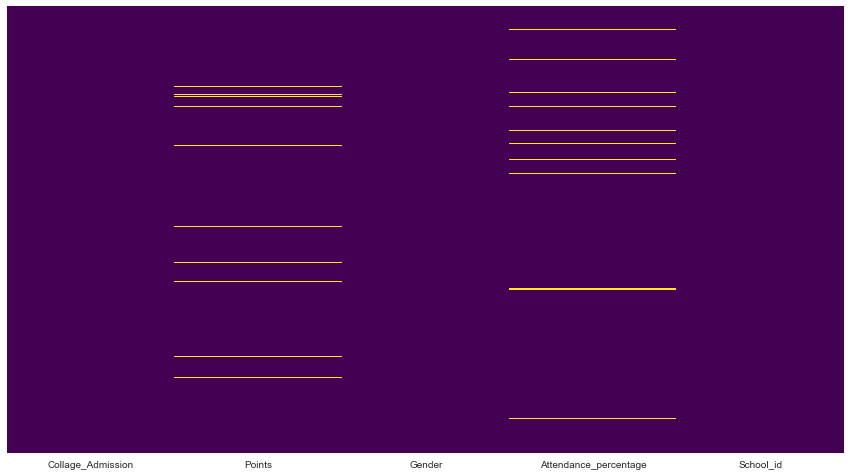

In [80]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

This heat map shows that there are missing values in the Points and Attendance_percentage columns. We will drop these rows out of the dataframe.

In [81]:
train.dropna(subset=['Points'], inplace=True)
train.dropna(subset=['Attendance_percentage'], inplace=True)

Lets continue to examine the data using seaborn

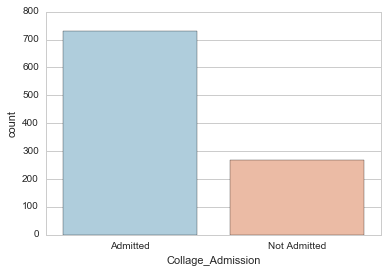

In [82]:
sns.set_style('whitegrid')
sns.countplot(x='Collage_Admission',data=train,palette='RdBu_r')

So it looks like more than 200 of the students were accepted to collage. 1= Accepted 0=not accepted 

Now we can look at the Gender in this chart also. It looks like in this case slightly more Males were admitted to collage.

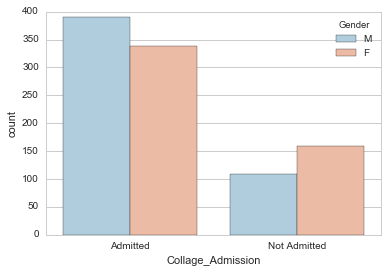

In [83]:
sns.set_style('whitegrid')
sns.countplot(x='Collage_Admission',hue='Gender',data=train,palette='RdBu_r')

# The Logistic Regression Process - Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! The machine learning machine learning needs the data to be in numeric form to work.

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 1046
Data columns (total 5 columns):
Collage_Admission        998 non-null object
Points                   998 non-null float64
Gender                   998 non-null object
Attendance_percentage    998 non-null float64
School_id                998 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 39.0+ KB


You see those variable with the object data type. We will need to convert them to dummy variables that can be mapped back to the original once the regression is complete. Pandas has a built in feature called get_dummies that does exactly this.

In [85]:
Gen = pd.get_dummies(train['Gender'],drop_first=True)
Adm = pd.get_dummies(train['Collage_Admission'],drop_first=True)

Now we have to drop the object we just mapped using the get_dummies method and append the new variables to the dataframe.

In [86]:
train.drop(['Gender','Collage_Admission'],axis=1,inplace=True)

And then append the new variables to the dataframe.

In [87]:
train = pd.concat([train,Gen,Adm],axis=1)

Lets look at the new dataframe

In [88]:
train.rename(columns={'1': 'Admitted'}, inplace=True)

In [89]:
train.head()

,Points,Attendance_percentage,School_id,M,Not Admitted
0,600.0,96.0,1,1.0,0.0
1,540.0,94.0,1,1.0,0.0
2,360.0,82.0,1,1.0,0.0
3,600.0,93.0,2,1.0,0.0
4,550.0,82.0,2,1.0,0.0


# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set 

## Train Test Split
We need to split the data set into parts to allow for the training of the model. I have chosen a 30 / 70 split of the dataset.

In [90]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Not Admitted',axis=1), 
                                                    train['Not Admitted'], test_size=0.20, 
                                                    random_state=101)

## Training and Predicting

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now use the Predict function and assign the output to an object for review.

In [118]:
predictions = logmodel.predict(X_test)

## Logistic Regression Model Evaluation
<br>We can check precision,recall,f1-score using classification report.

In [119]:
from sklearn.metrics import classification_report

In [120]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.80      0.87      0.83       140
        1.0       0.62      0.48      0.54        60

avg / total       0.74      0.76      0.75       200



In the matrix above we are looking at: <br>
<b>Precision:</b> Measures how accurate the out positive (correct) predictions are. Where 1.00 will be the max<br>
<b>Recall:</b> Measures the fraction of the positives our model  identified.<br>
<b>f1-score:</b> The average between the Precision and Recall scores.<br>

So we have an accuracy of 74% which is not to bad.